<a href="https://colab.research.google.com/github/parsa-fathi/CHP-Plant/blob/master/Final_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from tensorflow.keras.callbacks import EarlyStopping

# تنظیم seed برای بازتولیدپذیری
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# بارگذاری داده‌ها
column_names = ['W_PV  [kW]', 'E_in_pv', 'Ex_s', 'W_tot  [kW]', 'Q_dot_heating', 'PEM_threshold', 'W_dot_comp  [kW]', 'C_p_el_tot  [kW]', 'C_p_h_tot', 'Eta_en_CHP', 'Eta_ex_CHP', 'Q_dot_cond', 'Q_dot_useful_kW', 'Q_dot_GE', 'W_GE  [kW]', 'W_PEM_kw', 'W_ex', 'm_dot_H2_h  [Kg/hr]', 'm_dot_O2_h  [Kg/hr]','T_eva','T_PEM']
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Maghaleh/Train.CSV', names=column_names)  # جایگزین کنید با مسیر فایل شما

# تقسیم داده‌ها به ورودی‌ها (X) و خروجی‌ها (y)
X = pd.concat([data.iloc[:, 0:6], data.iloc[:, -2:]], axis=1).values
y = data.iloc[:, [7,8,10]].values

# تقسیم داده‌ها به مجموعه آموزش و آزمون
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=seed_value)

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)

# استانداردسازی خروجی‌ها
scaler_y = StandardScaler()
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# ساخت مدل شبکه عصبی برای رگرسیون
# reg_model = Sequential()
# reg_model.add(Dense(36, input_dim=X_train.shape[1], activation='relu'))
# reg_model.add(Dense(48, activation='elu'))
# reg_model.add(Dense(48, activation='tanh'))
# reg_model.add(Dense(3, activation='linear'))  # لایه خروجی با تابع فعال‌سازی خطی

# # کامپایل کردن مدل
# reg_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


# reg_model.fit(X_train, y_train, epochs=325, batch_size=256, validation_data=(X_test, y_test), validation_split=0.2)

# # پیش‌بینی
# y_pred = reg_model.predict(X_test)

# # بازگردانی مقیاس پیش‌بینی‌ها و واقعی‌ها
# y_test_inv = scaler_y.inverse_transform(y_test)
# y_pred_inv = scaler_y.inverse_transform(y_pred)

# # محاسبه R^2
# r2 = r2_score(y_test_inv, y_pred_inv)
# print(f'R^2 Score: {r2:.4f}')


In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
import random
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import r2_score

# تنظیم seed برای بازتولیدپذیری
seed_value = 0
np.random.seed(seed_value)
tf.random.set_seed(seed_value)
random.seed(seed_value)

# بارگذاری داده‌ها
column_names = ['W_PV  [kW]', 'E_in_pv', 'Ex_s', 'W_tot  [kW]', 'Q_dot_heating', 'PEM_threshold', 'W_dot_comp  [kW]', 'C_p_el_tot  [kW]', 'C_p_h_tot', 'Eta_en_CHP', 'Eta_ex_CHP', 'Q_dot_cond', 'Q_dot_useful_kW', 'Q_dot_GE', 'W_GE  [kW]', 'W_PEM_kw', 'W_ex', 'm_dot_H2_h  [Kg/hr]', 'm_dot_O2_h  [Kg/hr]','T_eva','T_PEM']
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Maghaleh/Train.CSV', names=column_names)  # جایگزین کنید با مسیر فایل شما

# تقسیم داده‌ها به ورودی‌ها (X) و خروجی‌ها (y)
X = pd.concat([data.iloc[:, 0:6], data.iloc[:, -2:]], axis=1).values
y = data.iloc[:, [7,8,10]].values

# استانداردسازی داده‌ها
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

# استانداردسازی خروجی‌ها
scaler_y = StandardScaler()
y = scaler_y.fit_transform(y)

# ساخت مدل شبکه عصبی برای رگرسیون
reg_model = Sequential()
reg_model.add(Dense(128, input_dim=X_train.shape[1], activation='relu'))
reg_model.add(Dense(128, activation='elu'))
reg_model.add(Dense(128, activation='tanh'))
reg_model.add(Dense(3, activation='linear'))  # لایه خروجی با تابع فعال‌سازی خطی

# کامپایل کردن مدل
reg_model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# آموزش مدل با استفاده از کل داده‌ها
reg_model.fit(X, y, epochs=369, batch_size=256, validation_split=0.2)

# پیش‌بینی
y_pred = reg_model.predict(X)

# بازگردانی مقیاس پیش‌بینی‌ها و واقعی‌ها
y_inv = scaler_y.inverse_transform(y)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# محاسبه R^2
r2 = r2_score(y_inv, y_pred_inv)
print(f'R^2 Score: {r2:.4f}')


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/369
28/28 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.3761 - mae: 0.4477 - val_loss: 0.0974 - val_mae: 0.1973
Epoch 2/369
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0961 - mae: 0.1894 - val_loss: 0.0749 - val_mae: 0.1509
Epoch 3/369
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0778 - mae: 0.1551 - val_loss: 0.0659 - val_mae: 0.1429
Epoch 4/369
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0682 - mae: 0.1461 - val_loss: 0.0609 - val_mae: 0.1405
Epoch 5/369
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0614 - mae: 0.1399 - val_loss: 0.0565 - val_mae: 0.1364
Epoch 6/369
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0566 - mae: 0.1344 - val_loss: 0.0532 - val_mae: 0.1326
Epoch 7/369
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0526 - mae: 0.1290 - val_loss: 0.0495 - val_mae: 0.1256
Epoch 8/369
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0488 - mae: 0.1229 - val_loss: 0.0458 - val_mae: 0.1171
Epoch 9/369
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - los

In [4]:
X = pd.concat([data.iloc[:, 0:6], data.iloc[:, -2:]], axis=1).values
pd.DataFrame(X)

,0,1,2,3,4,5,6,7
0,5.170000e-11,0.000299,0.000281,48.90,51.67,19.140,10.10,77.33
1,5.090000e-11,0.000299,0.000281,47.60,28.05,24.280,17.82,83.77
2,5.020000e-11,0.000299,0.000280,54.73,49.84,26.180,16.76,75.33
3,5.030000e-11,0.000299,0.000280,49.58,108.90,2.293,18.61,78.38
4,5.040000e-11,0.000299,0.000280,58.15,97.20,1.656,13.58,78.74
...,...,...,...,...,...,...,...,...
8756,5.120000e-11,0.000299,0.000281,50.58,56.56,1.762,19.56,83.09
8757,5.130000e-11,0.000299,0.000281,41.90,68.75,15.420,16.76,73.02
8758,5.140000e-11,0.000299,0.000281,42.93,88.46,10.090,14.55,79.34
8759,5.150000e-11,0.000299,0.000281,47.29,96.85,4.948,18.70,79.09


In [5]:
column_names = ['W_PV  [kW]', 'E_in_pv', 'Ex_s', 'W_tot  [kW]', 'Q_dot_heating', 'PEM_threshold', 'W_dot_comp  [kW]', 'C_p_el_tot  [kW]', 'C_p_h_tot', 'Eta_en_CHP', 'Eta_ex_CHP', 'Q_dot_cond', 'Q_dot_useful_kW', 'Q_dot_GE', 'W_GE  [kW]', 'W_PEM_kw', 'W_ex', 'm_dot_H2_h  [Kg/hr]', 'm_dot_O2_h  [Kg/hr]','T_eva','T_PEM']
validation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Maghaleh/Validation.CSV', names=column_names)
x_test = pd.concat([data.iloc[:, 0:6], data.iloc[:, -2:]], axis=1).values
y_test = data.iloc[:, [7,8,10]].values






x_test = scaler_X.transform(x_test)


y_pred = reg_model.predict(x_test)
y_pred_inv = scaler_y.inverse_transform(y_pred)

# محاسبه R^2
r2 = r2_score(y_test, y_pred_inv)
print(f'R^2 Score: {r2:.4f}')

274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R^2 Score: 0.9984


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R^2 Score on Validation Data: 0.9943


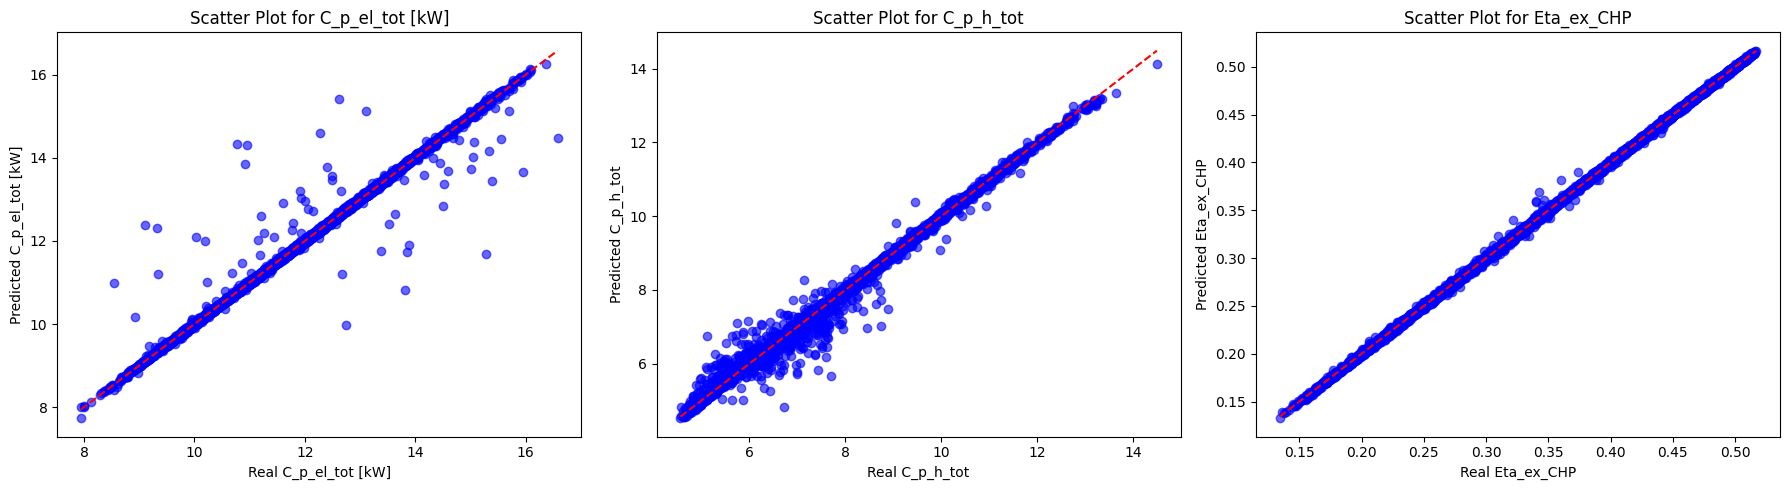

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming 'validation' has been already loaded as mentioned in your code
# If not, use the line below:
# validation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Maghaleh/Validation.CSV', names=column_names)

# Prepare test data from validation dataset
x_test_val = pd.concat([validation.iloc[:, 0:6], validation.iloc[:, -2:]], axis=1).values
y_test_val = validation.iloc[:, [7, 8, 10]].values

# Transform the validation data using the same scaler used for training data
x_test_val_scaled = scaler_X.transform(x_test_val)

# Predict using the model
y_pred_val = reg_model.predict(x_test_val_scaled)

# Inverse transform the predicted values
y_pred_val_inv = scaler_y.inverse_transform(y_pred_val)

# Calculate R^2 score for validation data
r2_val = r2_score(y_test_val, y_pred_val_inv)
print(f'R^2 Score on Validation Data: {r2_val:.4f}')

# Plotting the actual vs predicted values for each output
fig, ax = plt.subplots(1, 3, figsize=(18, 5))
output_labels = ['C_p_el_tot [kW]', 'C_p_h_tot', 'Eta_ex_CHP']  # Labels for the three outputs

for i in range(3):
    ax[i].scatter(y_test_val[:, i], y_pred_val_inv[:, i], color='blue', alpha=0.6)
    ax[i].plot([min(y_test_val[:, i]), max(y_test_val[:, i])],
               [min(y_test_val[:, i]), max(y_test_val[:, i])],
               color='red', linestyle='--')
    ax[i].set_xlabel(f'Real {output_labels[i]}')
    ax[i].set_ylabel(f'Predicted {output_labels[i]}')
    ax[i].set_title(f'Scatter Plot for {output_labels[i]}')

plt.tight_layout()
plt.show()


In [7]:
r2_c_p_el_tot = r2_score(y_test_val[:, 0], y_pred_val_inv[:, 0])
r2_c_p_h_tot = r2_score(y_test_val[:, 1], y_pred_val_inv[:, 1])
r2_eta_ex_chp = r2_score(y_test_val[:, 2], y_pred_val_inv[:, 2])

print(f'R² Score for C_p_el_tot [kW]: {r2_c_p_el_tot:.4f}')
print(f'R² Score for C_p_h_tot: {r2_c_p_h_tot:.4f}')
print(f'R² Score for Eta_ex_CHP: {r2_eta_ex_chp:.4f}')


R² Score for C_p_el_tot [kW]: 0.9883
R² Score for C_p_h_tot: 0.9950
R² Score for Eta_ex_CHP: 0.9998


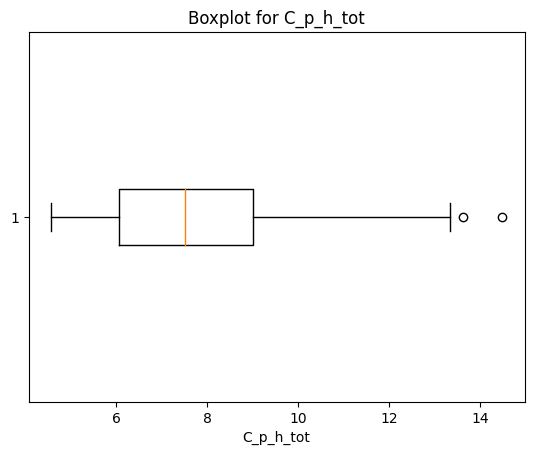

In [8]:
# Check for outliers in the target variable C_p_h_tot
plt.boxplot(y_test_val[:, 1], vert=False)
plt.title('Boxplot for C_p_h_tot')
plt.xlabel('C_p_h_tot')
plt.show()


274/274 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
R² Score for Eta_ex_CHP: 0.9998


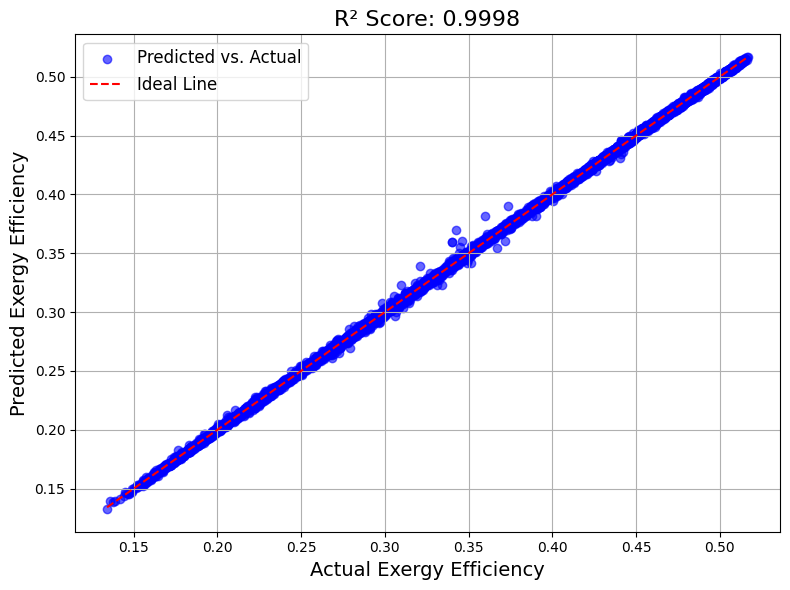

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Assuming 'validation' is already loaded and processed
# Prepare test data from validation dataset
x_test_val = pd.concat([validation.iloc[:, 0:6], validation.iloc[:, -2:]], axis=1).values
y_test_val = validation.iloc[:, [7, 8, 10]].values

# Transform the validation data using the same scaler used for training data
x_test_val_scaled = scaler_X.transform(x_test_val)

# Predict using the model
y_pred_val = reg_model.predict(x_test_val_scaled)

# Inverse transform the predicted values
y_pred_val_inv = scaler_y.inverse_transform(y_pred_val)

# Calculate R² score for Eta_ex_CHP
r2_eta_ex_chp = r2_score(y_test_val[:, 2], y_pred_val_inv[:, 2])
print(f'R² Score for Eta_ex_CHP: {r2_eta_ex_chp:.4f}')

# Scatter plot for Eta_ex_CHP
plt.figure(figsize=(8, 6))
plt.scatter(y_test_val[:, 2], y_pred_val_inv[:, 2], color='blue', alpha=0.6, label='Predicted vs. Actual')
plt.plot([min(y_test_val[:, 2]), max(y_test_val[:, 2])],
         [min(y_test_val[:, 2]), max(y_test_val[:, 2])],
         color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual Exergy Efficiency', fontsize=14)
plt.ylabel('Predicted Exergy Efficiency', fontsize=14)
plt.title(f'R² Score: {r2_eta_ex_chp:.4f}', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('Eta_ex_CHP_Scatter.png', dpi=300)  # Save plot as high-resolution image
plt.show()


R² Score for C_p_h_tot: 0.9950


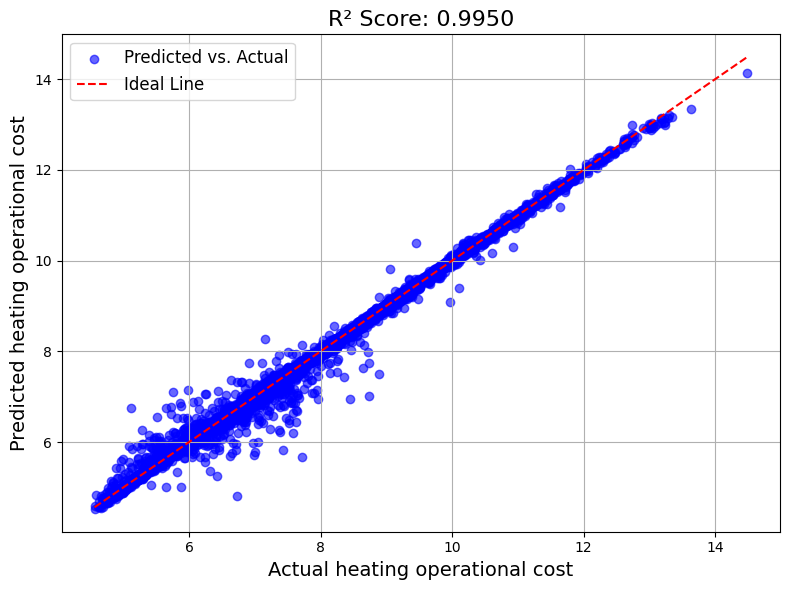

R² Score for C_p_el_tot: 0.9883


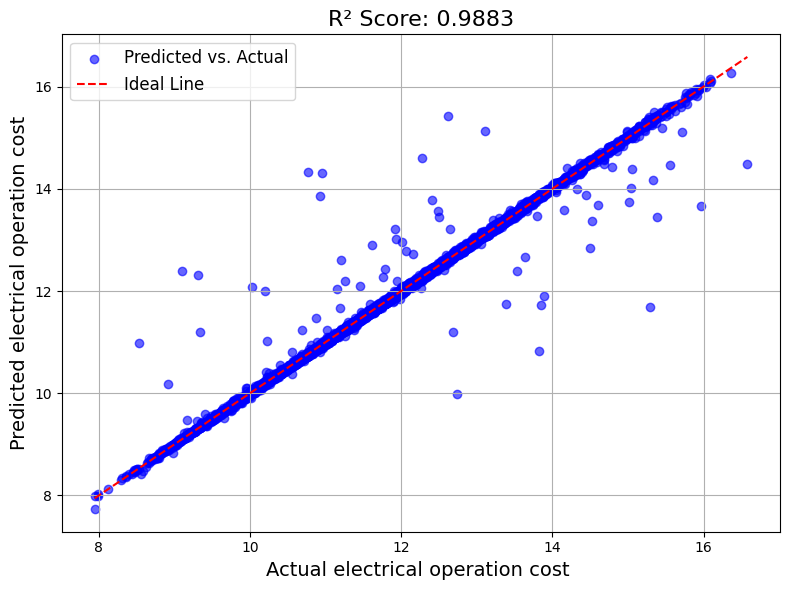

In [11]:
# prompt: Do the same thing for C_p_h_tot and C_p_el_tot and draw the actual vs predicted chart

import matplotlib.pyplot as plt
# Calculate R² score for C_p_h_tot
r2_c_p_h_tot = r2_score(y_test_val[:, 1], y_pred_val_inv[:, 1])
print(f'R² Score for C_p_h_tot: {r2_c_p_h_tot:.4f}')

# Scatter plot for C_p_h_tot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_val[:, 1], y_pred_val_inv[:, 1], color='blue', alpha=0.6, label='Predicted vs. Actual')
plt.plot([min(y_test_val[:, 1]), max(y_test_val[:, 1])],
         [min(y_test_val[:, 1]), max(y_test_val[:, 1])],
         color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual heating operational cost', fontsize=14)
plt.ylabel('Predicted heating operational cost', fontsize=14)
plt.title(f'R² Score: {r2_c_p_h_tot:.4f}', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('C_p_h_tot_Scatter.png', dpi=300)  # Save plot as high-resolution image
plt.show()

# Calculate R² score for C_p_el_tot
r2_c_p_el_tot = r2_score(y_test_val[:, 0], y_pred_val_inv[:, 0])
print(f'R² Score for C_p_el_tot: {r2_c_p_el_tot:.4f}')

# Scatter plot for C_p_el_tot
plt.figure(figsize=(8, 6))
plt.scatter(y_test_val[:, 0], y_pred_val_inv[:, 0], color='blue', alpha=0.6, label='Predicted vs. Actual')
plt.plot([min(y_test_val[:, 0]), max(y_test_val[:, 0])],
         [min(y_test_val[:, 0]), max(y_test_val[:, 0])],
         color='red', linestyle='--', label='Ideal Line')
plt.xlabel('Actual electrical operation cost ', fontsize=14)
plt.ylabel('Predicted electrical operation cost', fontsize=14)
plt.title(f'R² Score: {r2_c_p_el_tot:.4f}', fontsize=16)
plt.legend(fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.savefig('C_p_el_tot_Scatter.png', dpi=300)  # Save plot as high-resolution image
plt.show()


In [5]:
data2 = data[["W_PV  [kW]",'E_in_pv', 'Ex_s']].copy()

In [6]:
data2

,W_PV [kW],E_in_pv,Ex_s
0,5.170000e-11,0.000299,0.000281
1,5.090000e-11,0.000299,0.000281
2,5.020000e-11,0.000299,0.000280
3,5.030000e-11,0.000299,0.000280
4,5.040000e-11,0.000299,0.000280
...,...,...,...
8756,5.120000e-11,0.000299,0.000281
8757,5.130000e-11,0.000299,0.000281
8758,5.140000e-11,0.000299,0.000281
8759,5.150000e-11,0.000299,0.000281


In [7]:
import numpy as np

#exergy cost function

def Cost_function(params):
  W_tot = params[0]
  Q_dot_heating = params[1]
  PEM_threshold = params[2]
  T_eva = params[3]
  T_PEM = params[4]



  test_data = pd.DataFrame({'W_tot  [kW]': np.ones(8761)*W_tot,'Q_dot_heating': np.ones(8761)*Q_dot_heating,'PEM_threshold': np.ones(8761)*PEM_threshold,'T_eva':np.ones(8761)*T_eva,'T_PEM': np.ones(8761)*T_PEM})
  input_df = pd.concat([data2, test_data], axis=1).values

  input_data = scaler_X.transform(input_df)
  y_pred =  reg_model.predict(input_data,verbose = False)
  y_pred_inv = pd.DataFrame(scaler_y.inverse_transform(y_pred))

  C_p_el_tot = y_pred_inv[0].sum()
  C_p_h_tot = y_pred_inv[1].sum()
  Eta_ex_CHP_avg = y_pred_inv[2].mean()


  return  1/Eta_ex_CHP_avg






In [8]:
import numpy as np
import random

# تابعی که می‌خواهیم بهینه‌سازی کنیم
def objective_function(x):
    # مثال: تابع راسترگین (Rastrigin function)
    return Cost_function(x)

# تابع برای ایجاد جمعیت اولیه
def create_population(pop_size, var_ranges):
    population = []
    for _ in range(pop_size):
        individual = [random.uniform(rng[0], rng[1]) for rng in var_ranges]
        population.append(individual)
    return population

# تابع برای ارزیابی جمعیت
def evaluate_population(population):
    return [objective_function(individual) for individual in population]

# انتخاب براساس تورنومنت
def tournament_selection(population, fitness, k=3):
    selected = random.sample(list(zip(population, fitness)), k)
    selected.sort(key=lambda ind_fit: ind_fit[1])
    return selected[0][0]

# تابع کراس‌اور (ترکیب دو کروموزوم)
def crossover(parent1, parent2, crossover_rate=0.8):
    if random.random() < crossover_rate:
        point = random.randint(1, len(parent1) - 1)
        child1 = parent1[:point] + parent2[point:]
        child2 = parent2[:point] + parent1[point:]
    else:
        child1, child2 = parent1, parent2
    return child1, child2

# تابع جهش (موتاسیون) با قابلیت تنظیم نرخ جهش برای هر پارامتر
def mutate(individual, mutation_rates, var_ranges):
    for i in range(len(individual)):
        if random.random() < mutation_rates[i]:
            individual[i] = random.uniform(var_ranges[i][0], var_ranges[i][1])
    return individual

# تابع اصلی الگوریتم ژنتیک
def genetic_algorithm(pop_size, var_ranges, generations, crossover_rate=0.9, mutation_rates=None):
    # اگر نرخ‌های جهش تعریف نشده باشند، از نرخ پیش‌فرض 0.02 استفاده می‌کنیم
    if mutation_rates is None:
        mutation_rates = [0.02] * len(var_ranges)

    # ایجاد جمعیت اولیه
    population = create_population(pop_size, var_ranges)

    for generation in range(generations):
        # ارزیابی جمعیت
        fitness = evaluate_population(population)

        # بهترین فرد (برای نمایش)
        best_individual = population[np.argmin(fitness)]
        best_fitness = min(fitness)
        print(f'Generation {generation}: Best Fitness = {best_fitness}, Best Individual = {best_individual}')

        # نسل جدید
        new_population = []

        # انتخاب و ایجاد نسل جدید
        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, fitness)
            parent2 = tournament_selection(population, fitness)

            child1, child2 = crossover(parent1, parent2, crossover_rate)
            child1 = mutate(child1, mutation_rates, var_ranges)
            child2 = mutate(child2, mutation_rates, var_ranges)

            new_population.append(child1)
            new_population.append(child2)

        # جایگزینی جمعیت قدیمی با نسل جدید
        population = new_population[:pop_size]

    # ارزیابی جمعیت نهایی و برگرداندن بهترین جواب
    fitness = evaluate_population(population)
    best_individual = population[np.argmin(fitness)]
    return best_individual, min(fitness)



In [9]:
import numpy as np
import random

# تابع هدف (مثال: تابع ساده برای بهینه‌سازی)
def objective_function(x):
    return Cost_function(x)  # مجموع مربع متغیرها

# تولید یک راه حل تصادفی جدید با تغییرات کوچک
def generate_new_solution(current_solution, bounds):
    new_solution = current_solution.copy()
    for i in range(len(new_solution)):
        # ایجاد یک تغییر کوچک در هر متغیر با توجه به دامنه مشخص‌شده
        change = random.uniform(-1, 1) * (bounds[i][1] - bounds[i][0]) * 0.1
        new_solution[i] += change
        # محدود کردن به دامنه متغیر
        new_solution[i] = max(bounds[i][0], min(new_solution[i], bounds[i][1]))
    return new_solution

# الگوریتم سرمایش تبریدی
def simulated_annealing(objective_function, bounds, max_iterations, initial_temp, cooling_rate):
    # شروع با راه حل تصادفی اولیه
    current_solution = np.array([random.uniform(b[0], b[1]) for b in bounds])
    current_value = objective_function(current_solution)

    best_solution = current_solution.copy()
    best_value = current_value

    temperature = initial_temp

    for iteration in range(max_iterations):
        # تولید راه حل جدید
        new_solution = generate_new_solution(current_solution, bounds)
        new_value = objective_function(new_solution)

        # محاسبه تغییر انرژی
        energy_diff = new_value - current_value

        # پذیرش راه‌حل جدید بر اساس احتمال یا بهبود مستقیم
        if energy_diff < 0 or random.uniform(0, 1) < np.exp(-energy_diff / temperature):
            current_solution = new_solution
            current_value = new_value

        # به‌روز‌رسانی بهترین راه‌حل
        if current_value < best_value:
            best_solution = current_solution.copy()
            best_value = current_value

        # کاهش دما
        temperature *= cooling_rate

        # نمایش وضعیت (اختیاری)
        print(f"Iteration {iteration+1}/{max_iterations}, Best Value: {best_value}, Temperature: {temperature}")

    return best_solution, best_value

**Exergy Optimization**

In [21]:
# پارامترها
pop_size = 50
var_ranges = [(40,60), (20,120),(1,30),(10,20),(70,90)]  # محدوده هر پارامتر
generations = 25
mutation_rates = [0.1, 0.1, 0.1,0.1,0.1]  # نرخ جهش برای هر پارامتر به ترتیب

# اجرای الگوریتم ژنتیک
best_solution, best_fitness = genetic_algorithm(pop_size, var_ranges, generations, mutation_rates=mutation_rates)

print(f'Best Solution: {best_solution}')
print(f'Best Fitness: {best_fitness}')

Generation 0: Best Fitness = 2.321301035329548, Best Individual = [59.970860616862296, 35.5198430692198, 27.104709230482012, 15.52726485973739, 70.77202284821036]
Generation 1: Best Fitness = 2.3004961627924594, Best Individual = [59.816957685314264, 91.7918256524509, 28.44136476134905, 15.378704557364081, 70.86942446581916]
Generation 2: Best Fitness = 2.2765502803179314, Best Individual = [59.816957685314264, 115.23067127509502, 17.41166125300164, 17.538941306037735, 70.08986414512594]
Generation 3: Best Fitness = 2.2765502803179314, Best Individual = [59.816957685314264, 115.23067127509502, 17.41166125300164, 17.538941306037735, 70.08986414512594]
Generation 4: Best Fitness = 2.2765502803179314, Best Individual = [59.816957685314264, 115.23067127509502, 17.41166125300164, 17.538941306037735, 70.08986414512594]
Generation 5: Best Fitness = 2.2718364894599694, Best Individual = [59.816957685314264, 115.23067127509502, 15.657754575701103, 19.49678675683002, 70.08986414512594]
Generatio

In [28]:

# پارامترهای الگوریتم
bounds = [(40,60), (20,120),(1,30),(10,20),(70,90)]  # دامنه برای هر متغیر
max_iterations = 500
initial_temp = 1000
cooling_rate = 0.97

# اجرای الگوریتم سرمایش تبریدی
best_solution, best_value = simulated_annealing(objective_function, bounds, max_iterations, initial_temp, cooling_rate)

print(f"Best Solution: {best_solution}, Best Value: {best_value}")

Iteration 1/500, Best Value: 2.450773136880571, Temperature: 970.0
Iteration 2/500, Best Value: 2.424953413438972, Temperature: 940.9
Iteration 3/500, Best Value: 2.401814171666445, Temperature: 912.673
Iteration 4/500, Best Value: 2.401814171666445, Temperature: 885.29281
Iteration 5/500, Best Value: 2.3760860926045573, Temperature: 858.7340257
Iteration 6/500, Best Value: 2.3760860926045573, Temperature: 832.9720049289999
Iteration 7/500, Best Value: 2.3760860926045573, Temperature: 807.9828447811299
Iteration 8/500, Best Value: 2.3760860926045573, Temperature: 783.743359437696
Iteration 9/500, Best Value: 2.3760860926045573, Temperature: 760.2310586545651
Iteration 10/500, Best Value: 2.3760860926045573, Temperature: 737.4241268949281
Iteration 11/500, Best Value: 2.3760860926045573, Temperature: 715.3014030880803
Iteration 12/500, Best Value: 2.3760860926045573, Temperature: 693.8423609954378
Iteration 13/500, Best Value: 2.3760860926045573, Temperature: 673.0270901655747
Iteration

In [29]:
import numpy as np
import random

# تابع هدف (مثال: تابع ساده برای بهینه‌سازی)
def objective_function(x):
    return Cost_function(x)  # مجموع مربع متغیرها

# تولید یک راه حل تصادفی جدید با تغییرات کوچک
def generate_new_solution(current_solution, bounds):
    new_solution = current_solution.copy()
    for i in range(len(new_solution)):
        # ایجاد یک تغییر کوچک در هر متغیر با توجه به دامنه مشخص‌شده
        change = random.uniform(-1, 1) * (bounds[i][1] - bounds[i][0]) * 0.1
        new_solution[i] += change
        # محدود کردن به دامنه متغیر
        new_solution[i] = max(bounds[i][0], min(new_solution[i], bounds[i][1]))
    return new_solution

# الگوریتم سرمایش تبریدی
def simulated_annealing(objective_function, bounds, max_iterations, initial_temp, cooling_rate):
    # شروع با راه حل تصادفی اولیه
    current_solution = np.array([random.uniform(b[0], b[1]) for b in bounds])
    current_value = objective_function(current_solution)

    best_solution = current_solution.copy()
    best_value = current_value

    temperature = initial_temp

    for iteration in range(max_iterations):
        # تولید راه حل جدید
        new_solution = generate_new_solution(current_solution, bounds)
        new_value = objective_function(new_solution)

        # محاسبه تغییر انرژی
        energy_diff = new_value - current_value

        # پذیرش راه‌حل جدید بر اساس احتمال یا بهبود مستقیم
        if energy_diff < 0 or random.uniform(0, 1) < np.exp(-energy_diff / temperature):
            current_solution = new_solution
            current_value = new_value

        # به‌روز‌رسانی بهترین راه‌حل
        if current_value < best_value:
            best_solution = current_solution.copy()
            best_value = current_value

        # کاهش دما
        temperature *= cooling_rate

        # نمایش وضعیت (اختیاری)
        print(f"Iteration {iteration+1}/{max_iterations}, Best Value: {best_value}, Temperature: {temperature}")

    return best_solution, best_value

**Operation Cost**

In [10]:
#Operation cost function


def Cost_function(params):
  W_tot = params[0]
  Q_dot_heating = params[1]
  PEM_threshold = params[2]
  T_eva = params[3]
  T_PEM = params[4]



  test_data = pd.DataFrame({'W_tot  [kW]': np.ones(8761)*W_tot,'Q_dot_heating': np.ones(8761)*Q_dot_heating,'PEM_threshold': np.ones(8761)*PEM_threshold,'T_eva':np.ones(8761)*T_eva,'T_PEM': np.ones(8761)*T_PEM})
  input_df = pd.concat([data2, test_data], axis=1).values

  input_data = scaler_X.transform(input_df)
  y_pred =  reg_model.predict(input_data,verbose = False)
  y_pred_inv = pd.DataFrame(scaler_y.inverse_transform(y_pred))

  C_p_el_tot = y_pred_inv[0].sum()
  C_p_h_tot = y_pred_inv[1].sum()
  Eta_ex_CHP_avg = y_pred_inv[2].mean()


  return  (C_p_el_tot+C_p_h_tot)

In [32]:
# پارامترها
pop_size = 50
var_ranges = [(40,60), (20,120),(1,30),(10,20),(70,90)]  # محدوده هر پارامتر
generations = 25
mutation_rates = [0.1, 0.1, 0.1,0.1,0.1]  # نرخ جهش برای هر پارامتر به ترتیب

# اجرای الگوریتم ژنتیک
best_solution, best_fitness = genetic_algorithm(pop_size, var_ranges, generations, mutation_rates=mutation_rates)

print(f'Best Solution: {best_solution}')
print(f'Best Fitness: {best_fitness}')

Generation 0: Best Fitness = 141814.40625, Best Individual = [46.526490644467074, 42.06584218224875, 21.60115765024897, 14.211158713568164, 73.42902937244595]
Generation 1: Best Fitness = 138064.34375, Best Individual = [42.470313893334094, 42.577663171485256, 24.440201727059424, 11.387175182802464, 72.95543401646515]
Generation 2: Best Fitness = 134114.859375, Best Individual = [44.083908350608596, 34.908575800254276, 28.789702586864166, 14.430048700136318, 70.89496287899283]
Generation 3: Best Fitness = 135623.0, Best Individual = [44.083908350608596, 34.908575800254276, 28.789702586864166, 12.94737744155741, 71.95457755858094]
Generation 4: Best Fitness = 133066.21875, Best Individual = [44.083908350608596, 34.908575800254276, 28.789702586864166, 14.35983825416907, 70.17028921223367]
Generation 5: Best Fitness = 132539.34375, Best Individual = [44.083908350608596, 20.28352641538727, 25.973449908691443, 14.35983825416907, 70.17028921223367]
Generation 6: Best Fitness = 132054.9375, B

In [11]:
# پارامترهای الگوریتم
bounds = [(40,60), (20,120),(1,30),(10,20),(70,90)]  # دامنه برای هر متغیر
max_iterations = 500
initial_temp = 1000
cooling_rate = 0.97

# اجرای الگوریتم سرمایش تبریدی
best_solution, best_value = simulated_annealing(objective_function, bounds, max_iterations, initial_temp, cooling_rate)

print(f"Best Solution: {best_solution}, Best Value: {best_value}")

Iteration 1/500, Best Value: 163939.046875, Temperature: 970.0
Iteration 2/500, Best Value: 163939.046875, Temperature: 940.9
Iteration 3/500, Best Value: 163939.046875, Temperature: 912.673
Iteration 4/500, Best Value: 163939.046875, Temperature: 885.29281
Iteration 5/500, Best Value: 163939.046875, Temperature: 858.7340257
Iteration 6/500, Best Value: 160651.203125, Temperature: 832.9720049289999
Iteration 7/500, Best Value: 160651.203125, Temperature: 807.9828447811299
Iteration 8/500, Best Value: 159262.46875, Temperature: 783.743359437696
Iteration 9/500, Best Value: 155308.34375, Temperature: 760.2310586545651
Iteration 10/500, Best Value: 155308.34375, Temperature: 737.4241268949281
Iteration 11/500, Best Value: 155145.625, Temperature: 715.3014030880803
Iteration 12/500, Best Value: 155145.625, Temperature: 693.8423609954378
Iteration 13/500, Best Value: 155145.625, Temperature: 673.0270901655747
Iteration 14/500, Best Value: 155145.625, Temperature: 652.8362774606074
Iteration